## K-means 클러스터링(군집모델)
1. 군집모델
    - K-means, DBSCAN, Mean-shift clustering, Agglomerative hierarchical clustering 등등

2.  KNN : 지도학습, K-means : 비지도학습
    - K-means 클러스터링은 미리 가지고 있는 정답(레이블=종속변수)없이 데이터의 특성과 구조를 발견해 내는 방식
    - KNN은 분류, K-means는 군집화

3. `K`(군집의 수) - `means`(각 군집의 중심)
    - 중심점 구하는 법 : 각 관측치들 간의 거리 평균값
    - 군집 방법 : 중심점과 군집 내 관측치 간의 거리를 비용함수로 하여, 이 함수값이 `최소화`되도록 중심점과 군집을 반복적으로 재정의해준다.
    - 거리를 이용 -> 데이터 `표준화`, `정규화` 필수
    - ![군집방법](./img/kmeans1.png)
    - ![군집방법](./img/kmeans2.png)

4. K-means의 단점 : Local minimum 현상
    - ![군집방법](./img/kmeans3.png)
    - 만약 2개의 k 중심점을 설정했을때, 2번과 같은 위치에 초기 중심점이 생겼을 때, 위쪽 중심점은 위에 있는 관측치들과 가장 가깝고, 아래쪽 중심점은 아래에 있는 관측치들과 가장 가깝게 된다. 이러한 현상을 지역 최솟값(Local minimum) 문제라 한다. 

5. Local minimum과 Global minimum
    - ![군집방법](./img/kmeans4.png)
    - 중심점과 군집 내 관측치의 거리 합이 최소화됐을 때 클러스터링 알고리즘이 종료되기 때문에 정말로 거리합이 최소화되는 전역 최솟값(Global minimum)을 찾기 전에 지역 최솟값에서 알고리즘이 종료되는 것.

6. Local minimum 현상 해결방법
    - 초기 중심점 선정 방법을 다양하게 하여 최적의 모델을 선정.
        - 초기 중심점 선정 방법 : 랜덤방식, 중심점들을 가능한 한 서로 멀리 떨어져서 설정하는 방법, 중심점이 밀집되지 않도록 하는 k-means++ 등 다양한 방법이 존재

7. 적절한 k의 수 산정방법
    - 1. 비지니스 도메인 지식을 통한 개수 선정
    - 2. 엘보우 기법 : 군집 내 중심점과 관측치 간 거리합이 급감하는 구간의 k개수를 선정하는 방법
        - ![엘보우기법](./img/엘보우기법.png)

    - 3. 실루엣 계수 활용
        - 실루엣 계수 : 군집 안의 관측치들이 다른 군집과 비교해서 얼마나 비슷한지를 나타내는 수치
        - 실루엣 계수 구하는 법 : 동일한 군집 안에 있는 관측치들 간의 평균거리와 가장 가까운 다른 군집과의 평균 거리를 구함. 

8. k-means의 단점을 보완 => `DBSCAN`
    - ![잘못군집](./img/kmeans5.png)
    - 밀도 클러스터링 기법이 필요

## DBSCAN
1. K-means와의 차이 : 별도의 k 수 지정이 필요없다.
    - 관측치 밀도를 통해 자동으로 적절한 `k` 를 찾는다.

2. 밀도 측정 기준:
    - 기준 관측치로부터 이웃한 관측치인지 구별할 수 있는 거리 기준(epsilon)이 필요
    - 거리 기준 내에 포함된 이웃 관측치 수(minPts)에 대한 기준이 필요

3. DBSCAN의 장단점:
    - 장점 : 밀도를 가진 관측치들을 기준으로 군집화 -> U자형(오목형), H형 데이터 분포 효과적으로 군집화
    - 단점 : 독립변수가 늘어날 수록 연산량이 급증 & 데이터 특성을 모를 경우 적절한 파라미터 값을 설정하는 것이 어렵다. 

## k-means 클러스터링 실습

In [2]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.8 MB/s eta 0:00:00


### 1. 패키지 설치 및 임포트

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### 2. 데이터 불러오기 및 확인

In [4]:
df = pd.read_csv("./datasets/Mall_Customers.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3. 산점도 행렬 시각화

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


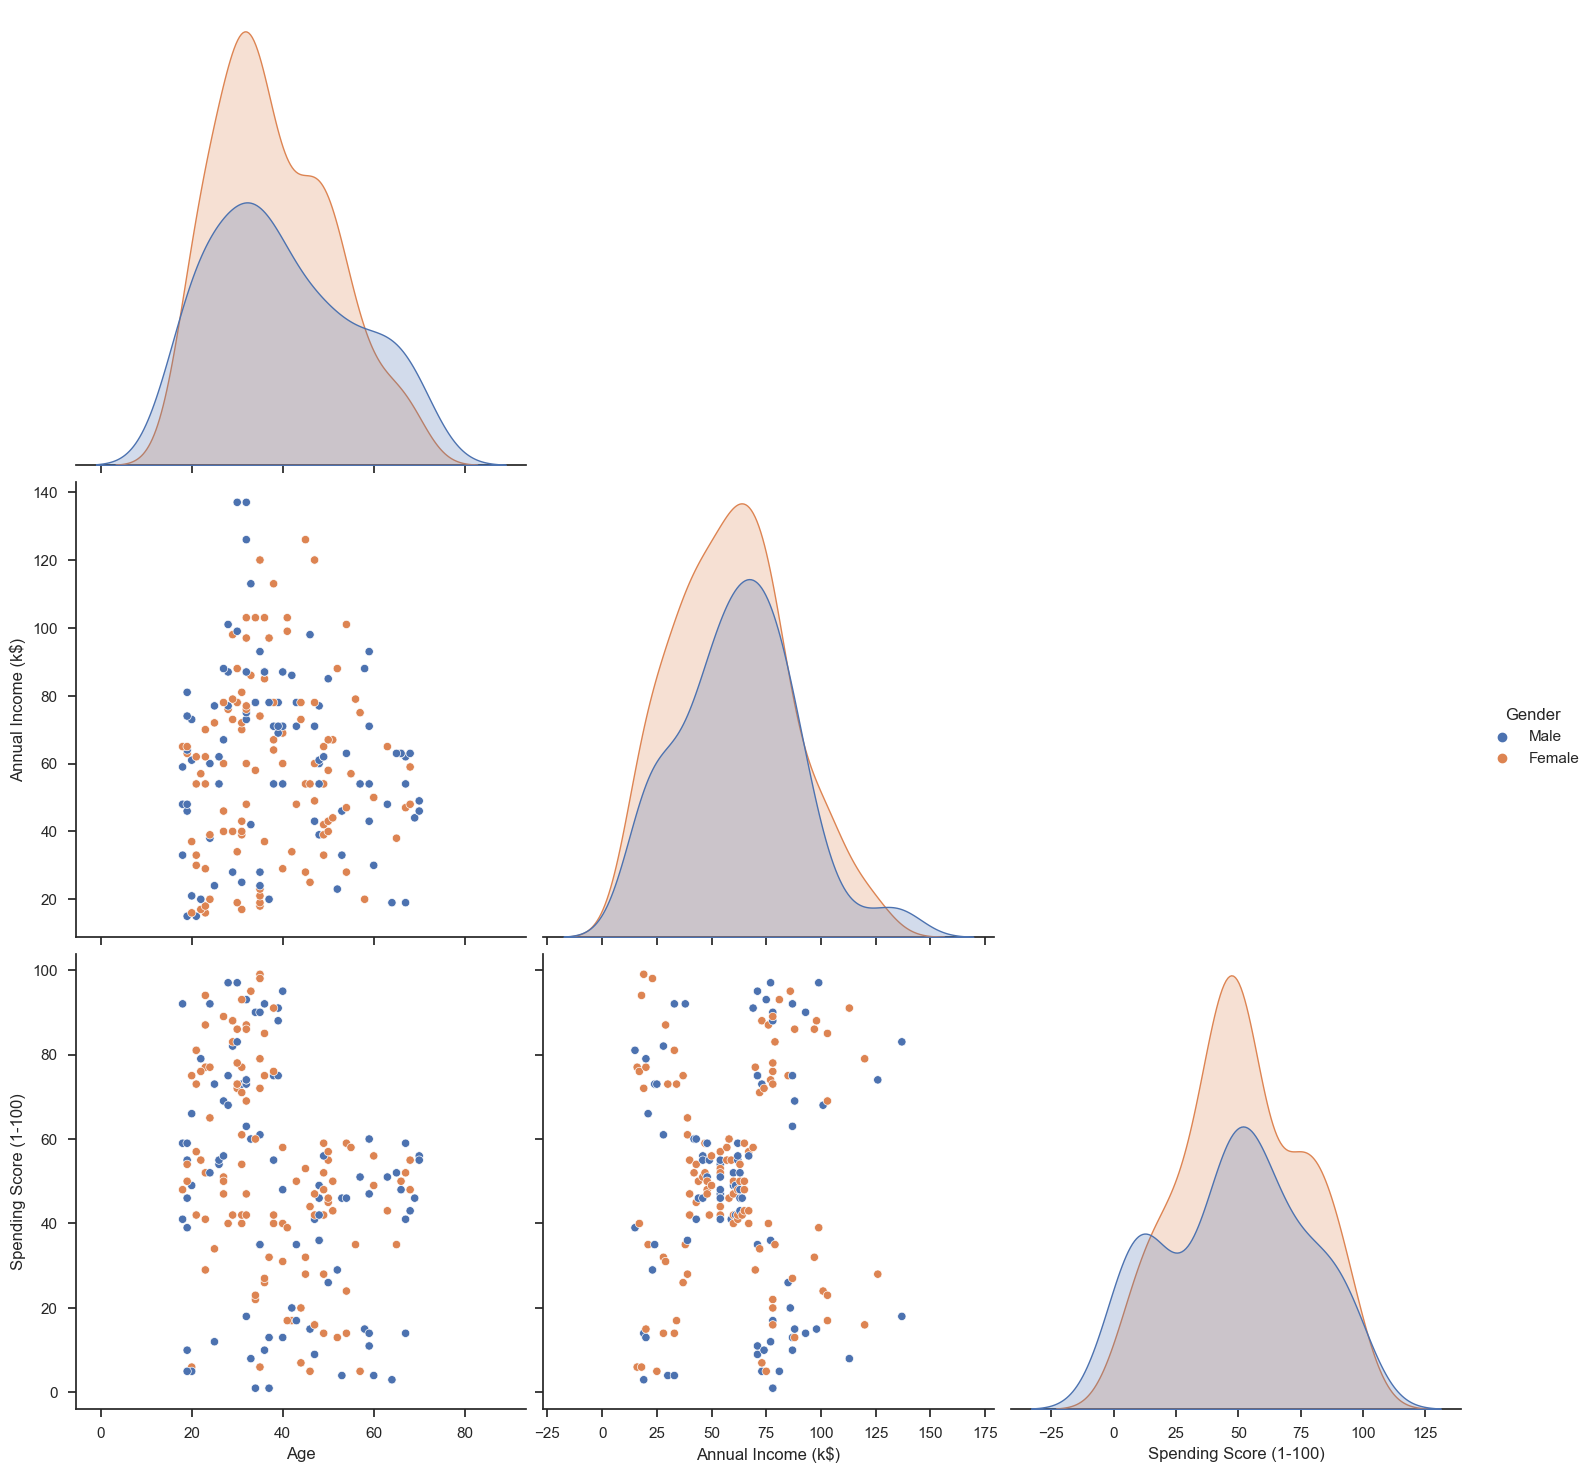

In [5]:
# ID 칼럼 제거 (필요X)
df1 = df.drop('CustomerID', axis=1)

sb.set(font_scale=1)
sb.set_style('ticks')
sb.pairplot(df1, 
            diag_kind='kde', #상관계수가 1이면 분포로 표시
            hue='Gender', 
            corner=True, # 대각선을 기준으로 한쪽만 그리기
            height=5)
plot_kws = {"s":100} # 개별 설정값 지정 (s:사이즈 = 100)

plt.show()

### 3. 데이터 스케일 정규화 및 가변수 처리

In [6]:
# Gender 변수 가변수 처리
df2 = pd.get_dummies(df1, columns=['Gender'], drop_first=True)

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df2)

# 칼럼명 결합
df_minmax = pd.DataFrame(data=df_minmax, columns=df2.columns)
df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


> k-means, DBSCAN은 모두 거리 기반 군집화 알고리즘이므로 정규화 스케일링 적용 & 성별변수는 1과 0으로 가변수 처리

### 4. 기본 k-means 클러스터링 모델 생성

In [7]:
kmeans_model_1 = KMeans(init='k-means++',   # 중심점이 밀집되지 않도록 함
                        n_clusters=3,       # 중심 수
                        n_init=10,          # 초기 중심위치 시도 횟수
                        max_iter=300,       # 최대 반복 횟수
                        random_state=37)

kmeans_model_1.fit(df_minmax)

# 최저 SSE 값
print(kmeans_model_1.inertia_)

# 각 군집의 중심점 좌표 확인
print(kmeans_model_1.cluster_centers_)

# 반복횟수
print(kmeans_model_1.n_iter_)

29.552857611943853
[[1.97115385e-01 3.85245902e-01 7.21173469e-01 1.00000000e+00]
 [3.86504121e-01 3.62704918e-01 5.15579446e-01 4.44089210e-16]
 [6.04567308e-01 3.88661202e-01 2.87840136e-01 1.00000000e+00]]
10


> k-means클러스터링은 클러스터내 오차제곱합(SSE)의 값이 최소가 되도록 클러스터의 중심을 결정하는 방법. = 엘보우 기법


## *적정 K 찾기 : 엘보우기법, 실루엣계수

엘보우 기법 : 군집 내 중심점과 관측치 간 거리합이 급감하는 구간의 k개수를 선정하는 방법


실루엣 계수 : 군집 안의 관측치들이 다른 군집과 비교해서 얼마나 비슷한지를 나타내는 수치

### 5. 엘보우 차트 시각화

<Axes: >

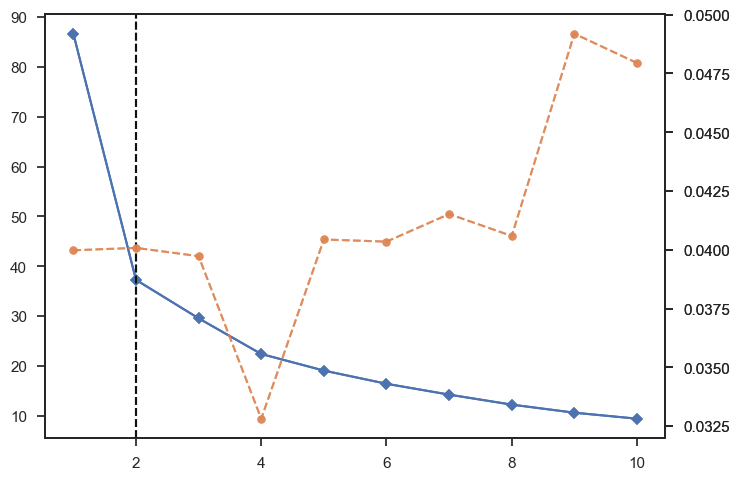

In [8]:
Elbow_Chart = KElbowVisualizer(kmeans_model_1, k=(1,11),)
Elbow_Chart.fit(df_minmax)
Elbow_Chart.draw()

> 2지점에서 급감

### 6. 실루엣 계수 선그래프 시각화

C:\Users\hanjieun_2\AppData\Local\Temp\ipykernel_35192\1039284190.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


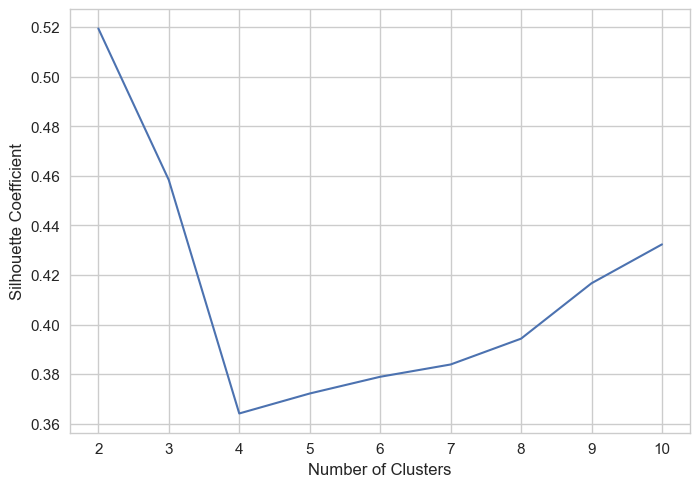

In [9]:
# k-means 모델 생성
kmeans_model_2 = {
    'init': 'k-means++',    # 중심점이 밀집되지 않도록
    'n_init' : 10,          # 초기 중심위치 시도 횟수
    'max_iter' : 300,       # 최대 반복 횟수
    'random_state' : 37,
}

# 각 k의 실루엣 계수 저장
silhouette_coef = []

# 실루엣 계수 그래프 생성
for k in range(2,11):
    kmeans_silhouette = KMeans(n_clusters=k, **kmeans_model_2)
    kmeans_silhouette.fit(df_minmax)
    score = silhouette_score(df_minmax, kmeans_silhouette.labels_)
    silhouette_coef.append(score)

plt.style.use('seaborn-whitegrid')
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


### 7. 실루엣 계수 분포 시각화

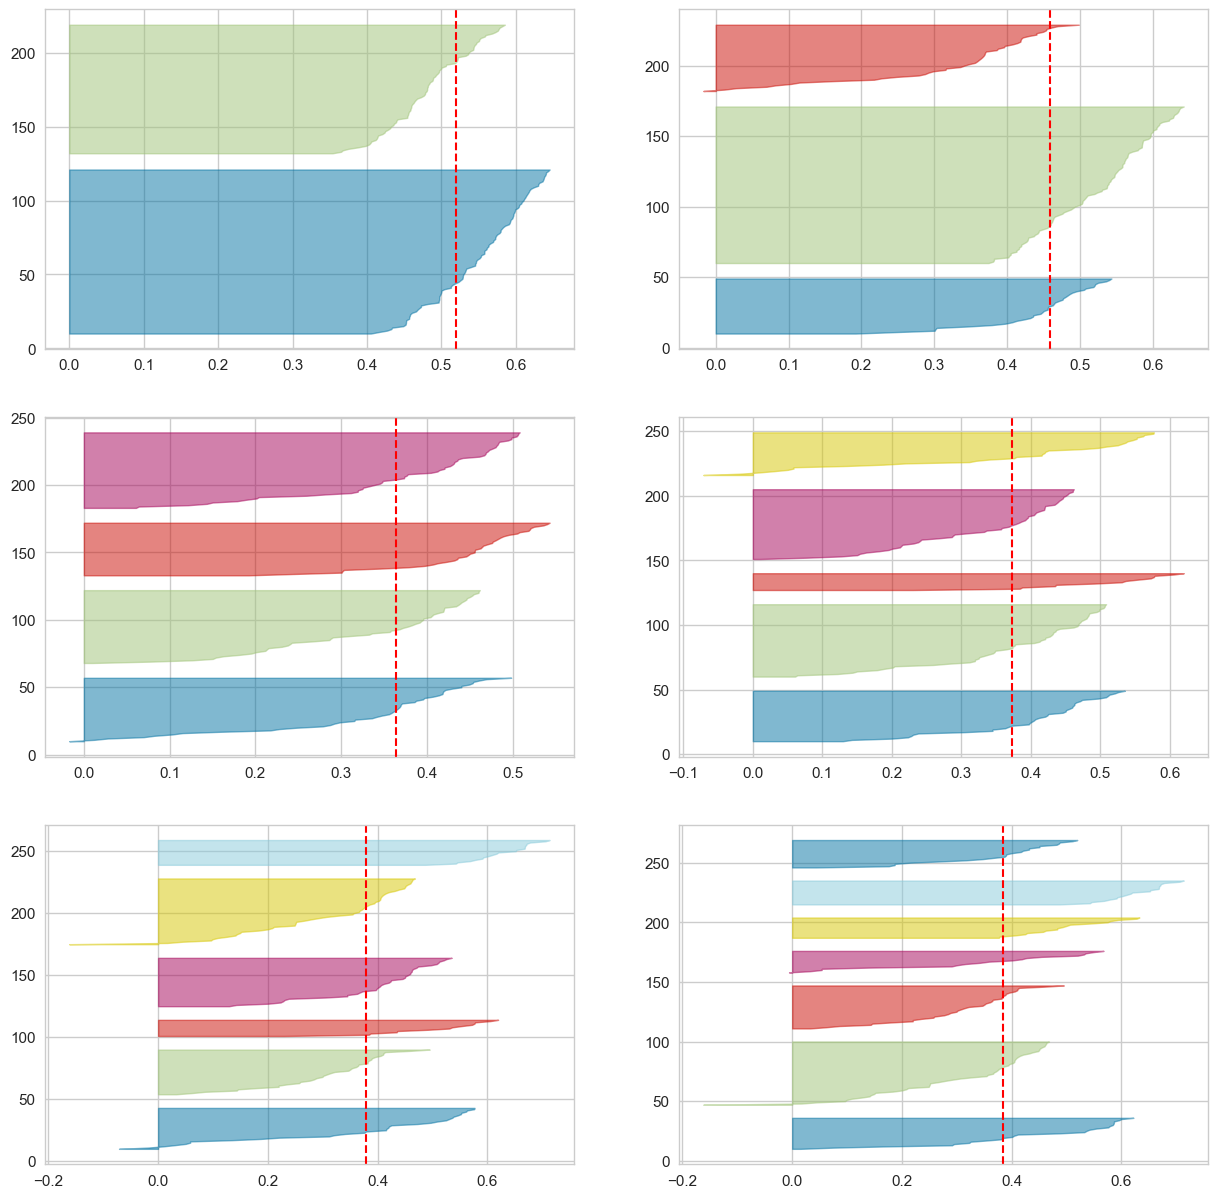

In [12]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

for i in [2,3,4,5,6,7]:
    # k-means 클러스터링 모델 생성
    kmeans_model_3 = KMeans(n_clusters=i,
                            init='k-means++',
                            n_init=10,
                            max_iter=300,
                            random_state=37)
    q, mod = divmod(i,2)

    # 실루엣 계수 시각화
    visualizer = SilhouetteVisualizer(kmeans_model_3,
                                      colors='yellowbrick',
                                      ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

> 4개의 군집에서 관측치가 균등하게 나뉘며 실루엣 계수의 편차도 고른 편. 

### 8. k-means 클러스터 결과 시각화

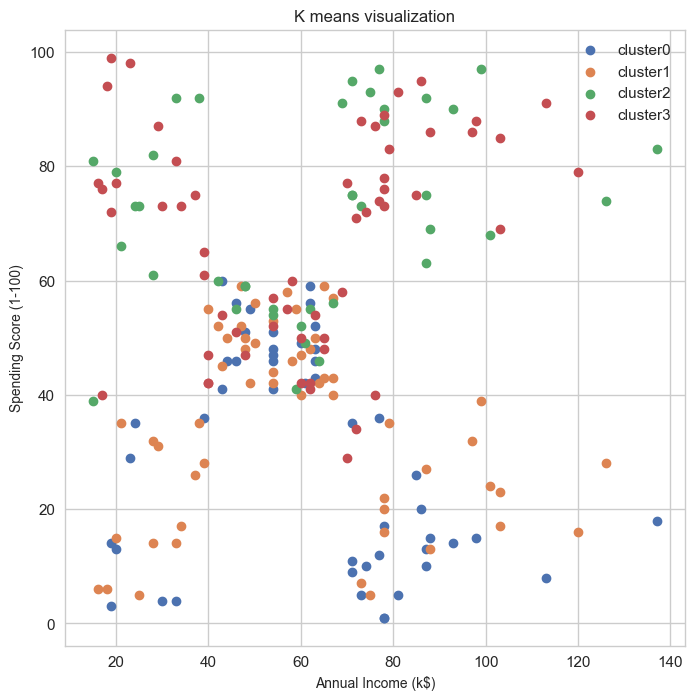

In [13]:
kmeans_model_4 = KMeans(
    init='k-means++',
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=37
)

# 군집 번호 결합
df2['cluster1'] = kmeans_model_4.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize=(8,8))

for i in range(0, df2['cluster1'].max() + 1):
    plt.scatter(df2.loc[df2['cluster1'] == i,           # x축
                        'Annual Income (k$)'],
                df2.loc[df2['cluster1'] == i,
                        'Spending Score (1-100)'],      # Y축
                label = 'cluster' + str(i))
    
plt.legend()
plt.title('K means visualization', size=12)
plt.xlabel('Annual Income (k$)', size=10)
plt.ylabel('Spending Score (1-100)', size=10)
plt.show()

> 성별, 연령 등 다른 변수가 있기 때문에 두 가지 변수로만 군집이 잘 나뉘어 졌는지 확인하는 것은 맞지 않다. 다만 대략적인 분포를 참고하기 위해 사용. 

> 0,1번 군집은 주로 위쪽에 분포, 2,3번 군집은 주로 아래쪽에 분포

### 9. DBSCAN 결과 시각화

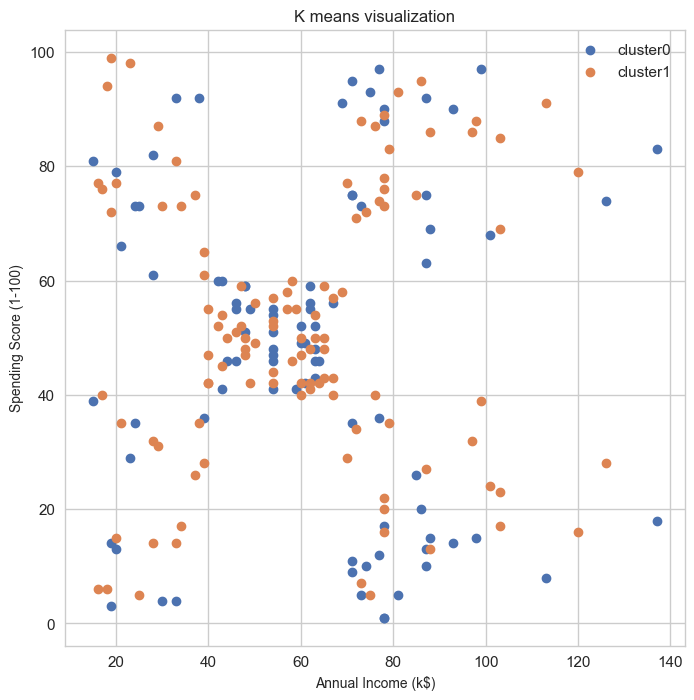

In [14]:
# DBSCAN 모델 설정
DBSCAN_model = DBSCAN(eps=0.7, min_samples=5)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
DBSCAN_model.fit(df_minmax)
df2['cluster2'] = DBSCAN_model.fit_predict(df_minmax)

# 시각화 설정
plt.figure(figsize=(8,8))

for i in range(0, df2['cluster2'].max() + 1):
    plt.scatter(df2.loc[df2['cluster2'] == i,           # x축
                        'Annual Income (k$)'],
                df2.loc[df2['cluster2'] == i,
                        'Spending Score (1-100)'],      # Y축
                label = 'cluster' + str(i))
    
plt.legend()
plt.title('K means visualization', size=12)
plt.xlabel('Annual Income (k$)', size=10)
plt.ylabel('Spending Score (1-100)', size=10)
plt.show()

> 밀도기반 DBSCAN 모델은 군집 수가 자동으로 설정되기 때문에 관측치 간의 거리를 설정하는 eps옵션과 한 군집에 속하는 최소 관측치 수를 설정하는 min_samples 옵션을 통해 군집 수를 간접적으로 조정할 수 있다.

### 10. k-means 군집별 특성 확인

In [15]:
df_kmeans = df2.groupby(['cluster1']).agg({'Age':'mean',
                                           'Annual Income (k$)':'mean',
                                           'Spending Score (1-100)':'mean',
                                           'Gender_Male':'mean'}).reset_index()

df_kmeans['cnt'] = df2.groupby('cluster1')['Age'].count()
df_kmeans.head()

,cluster1,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,49.437500,62.416667,29.208333,1.0,48
1,1,48.109091,58.818182,34.781818,0.0,55
2,2,28.250000,62.000000,71.675000,1.0,40
3,3,28.438596,59.666667,67.684211,0.0,57


> 군집0,2 는 남성, 군집1,3은 여성으로 분류. 

### 11. DBSCAN 군집별 특성 확인

In [17]:
df_DBSCAN = df2.groupby(['cluster2']).agg({'Age':'mean',
                                           'Annual Income (k$)':'mean',
                                           'Spending Score (1-100)':'mean',
                                           'Gender_Male':'mean'}).reset_index()

df_DBSCAN['cnt'] = df2.groupby('cluster2')['Age'].count()
df_DBSCAN.head()

,cluster2,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,cnt
0,0,39.806818,62.227273,48.511364,1.0,88
1,1,38.098214,59.250000,51.526786,0.0,112


> 성별에 따라 두 개의 군집으로 나뉘어짐. 성별은 더미변수이기 때문에 변별력이 강해서 다른 변수의 영향력을 압도한 것으로 보인다. 비지니스적으로 의미 있는 군집을 만들기 위해서는 성별 변수를 제거하거나 다른 변수를 추가해야 한다.